In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [60]:
df_out = pd.read_pickle('df_out.pkl')
df_breeds = pd.read_pickle('df_breeds.pkl')
df_out_with_breeds_info = pd.read_pickle('df_out_with_breeks_info.pkl')
df_breeds_with_info = pd.read_pickle('df_breeds_with_info.pkl')
df_out.info()
df_out.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     149511 non-null  Int64         
 1   Animal ID                 149511 non-null  string        
 2   Name                      106260 non-null  string        
 3   Outcome DateTime          149511 non-null  datetime64[ns]
 4   Outcome MonthYear         149511 non-null  string        
 5   Date of Birth             149511 non-null  datetime64[ns]
 6   Outcome Type              149485 non-null  string        
 7   Outcome Subtype           68443 non-null   string        
 8   Animal Type               149511 non-null  string        
 9   Sex upon Outcome          149509 non-null  string        
 10  Age upon Outcome          149465 non-null  string        
 11  Breed                     149511 non-null  string        
 12  Co

,index,Animal ID,Name,Outcome DateTime,Outcome MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,...,Color 1 G,Color 1 B,Color 1 H,Color 1 S,Color 1 V,Age upon Outcome (years),Male,Female,NeuteredOrSpayed,Adopted
0,61546,A659834,Dudley,2013-10-01 09:31:00,Oct 2013,2013-07-23,Adoption,Foster,Dog,Neutered Male,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.166667,True,False,True,True
1,50833,A664235,<NA>,2013-10-01 10:39:00,Oct 2013,2013-09-24,Transfer,Partner,Cat,Unknown,...,1.0,1.0,0.0,0.0,1.0,0.019231,False,False,False,False
2,93227,A664236,<NA>,2013-10-01 10:44:00,Oct 2013,2013-09-24,Transfer,Partner,Cat,Unknown,...,1.0,1.0,0.0,0.0,1.0,0.019231,False,False,False,False
3,109856,A664237,<NA>,2013-10-01 10:44:00,Oct 2013,2013-09-24,Transfer,Partner,Cat,Unknown,...,1.0,1.0,0.0,0.0,1.0,0.019231,False,False,False,False
4,12697,A664223,Moby,2013-10-01 11:03:00,Oct 2013,2009-09-30,Return to Owner,<NA>,Dog,Neutered Male,...,<NA>,<NA>,<NA>,<NA>,<NA>,4.0,True,False,True,False


In [61]:
df_breeds_with_info.head()

,Breed,Count,Animal Type,Adopted,Color 0 R (mean),Color 0 R (std dev),Color 0 G (mean),Color 0 G (std dev),Color 0 B (mean),Color 0 B (std dev),...,CKC Subgroup,height_low_inches,height_high_inches,average height,weight_low_lbs,weight_high_lbs,average weight,Lifespan Low,Lifespan High,average lifespan
0,Domestic Shorthair Mix,33260,Cat,0.461425,0.439476,0.412274,0.322711,0.323957,0.286948,0.413041,...,11-A: Pointing Dogs,21.0,26.0,23.5,45.0,70,57.5,10,12,11.0
1,Domestic Shorthair,13808,Cat,0.553158,0.451115,0.412934,0.331264,0.324532,0.293482,0.413847,...,11-A: Pointing Dogs,21.0,26.0,23.5,45.0,70,57.5,10,12,11.0
2,Pit Bull Mix,9406,Dog,0.431427,0.513666,0.403283,0.418784,0.381554,0.476534,0.439715,...,4-B: Bull-and-Terrier Breeds,17.0,22.0,19.5,30.0,75,52.5,10,12,11.0
3,Labrador Retriever Mix,7913,Dog,0.546063,0.409771,0.421755,0.329495,0.388036,0.181561,0.323025,...,11-C: Retrievers and Waterdogs,21.0,25.0,23.0,55.0,80,67.5,10,12,11.0
4,Chihuahua Shorthair Mix,6689,Dog,0.483181,0.609789,0.370759,0.493648,0.361854,0.356013,0.369441,...,12-A: Americas and Caribbean Breeds,5.0,10.0,7.5,1.0,7,4.0,14,16,15.0


In [62]:
def animalsLongerThan(days_limit):
    years_limit = days_limit / 365.25
    return df_out_with_breeds_info.loc[df_out_with_breeds_info["Years in animal center"] > years_limit]

/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

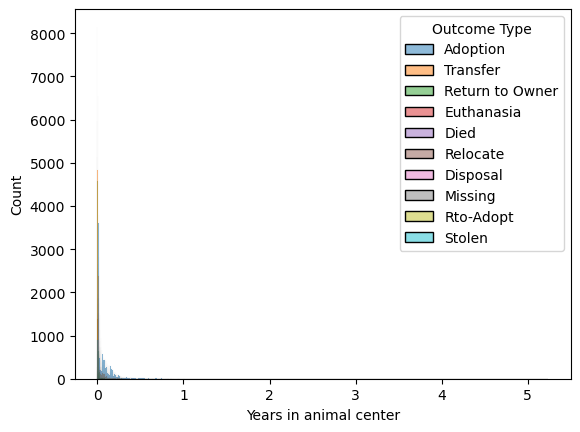

In [63]:
sns.histplot(
    data=df_out,
    x='Years in animal center',
    hue='Outcome Type'
)
plt.show()

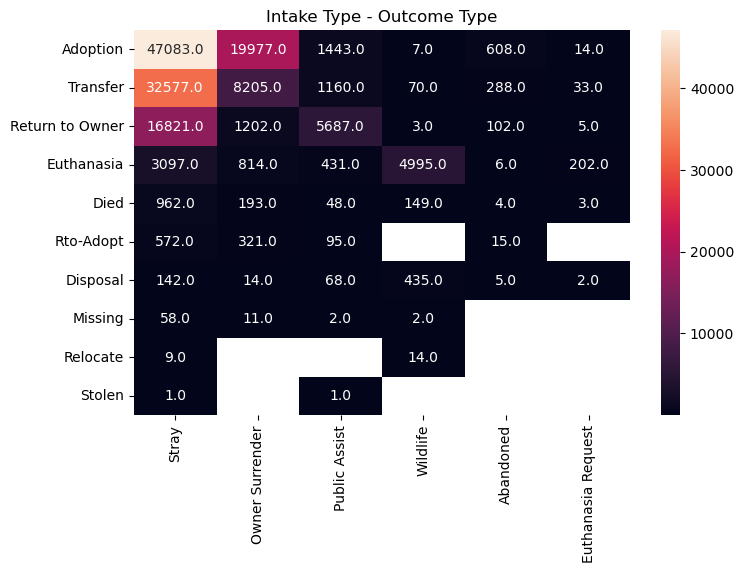

In [64]:
df_intake_outcome_type = pd.DataFrame()
df_intake_outcome_type_grouped = df_out[["Intake Type", "Outcome Type"]].value_counts()
for (intake_type, outcome_type), count in df_intake_outcome_type_grouped.items():
    df_intake_outcome_type.at[outcome_type, intake_type] = int(count)

plt.figure(figsize=(8,5))
sns.heatmap(data=df_intake_outcome_type, annot=True, fmt="0")
plt.title("Intake Type - Outcome Type")
plt.show()

# Analysis by breed

In [65]:
def breeds(df_animals):
    df_breeds_filtered = pd.DataFrame(columns=['Breed', 'Count'])

    copy_columns = [column for column in df_breeds_with_info.columns if column not in df_breeds.columns]

    for breed, loc in df_animals.groupby("Breed").groups.items():
        df_out_filtered_breed = df_animals.loc[loc]
        df_breeds_filtered.at[breed, 'Breed'] = breed
        df_breeds_filtered.at[breed, 'Count'] = df_out_filtered_breed.shape[0]
        df_breeds_filtered.at[breed, 'Adopted'] = df_out_filtered_breed.Adopted.mean()
        
        df_breeds_with_info_row = df_breeds_with_info.loc[df_breeds_with_info.Breed == breed]
        for column in copy_columns:
            df_breeds_filtered.at[breed, column] = df_breeds_with_info_row[column].values[0]
        
    return df_breeds_filtered

### Popular breeds

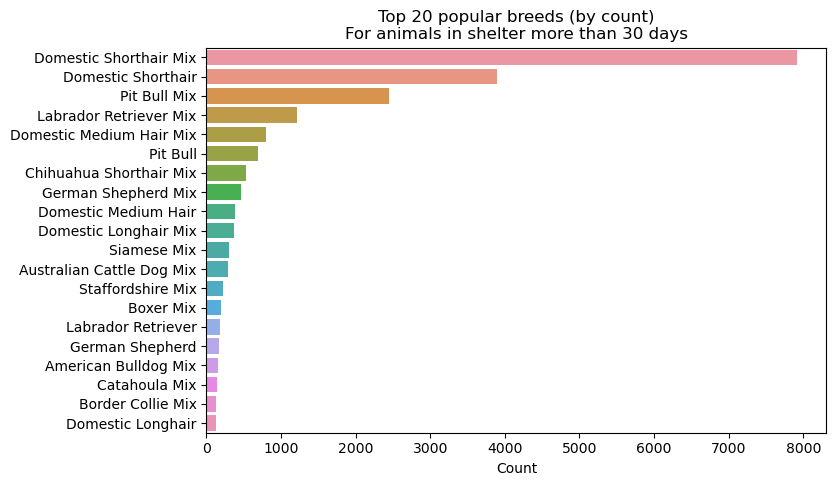

In [66]:
days_limit = 30

df_breeds_filtered = breeds(animalsLongerThan(days_limit))
df_breeds_filtered.sort_values('Count', ascending=False, inplace=True)

k = 20
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_breeds_filtered.head(k),
    x='Count',
    y='Breed',
    errorbar=None,
)
plt.xlabel('Count')
plt.ylabel(None)
plt.title(f'Top {k} popular breeds (by count)\nFor animals in shelter more than {days_limit} days')
plt.show()

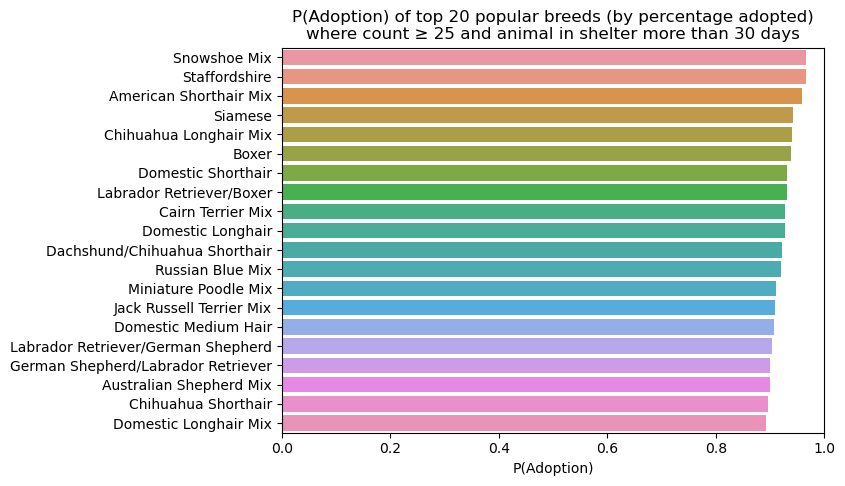

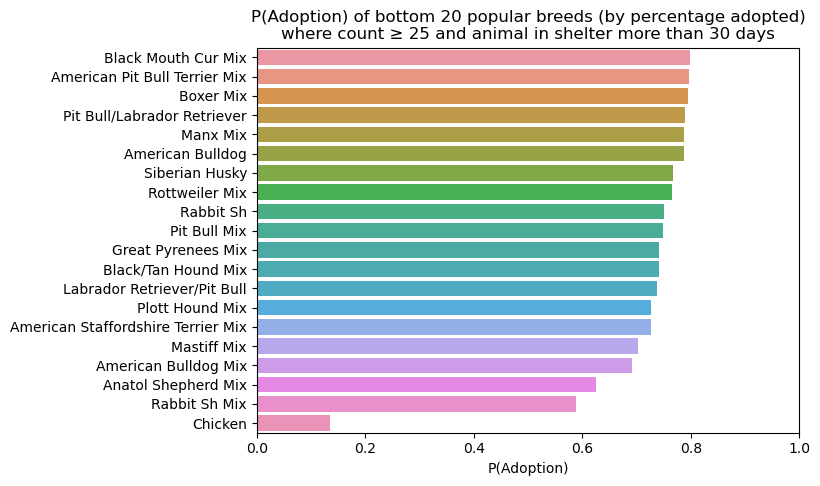

In [67]:
days_limit = 30
df_breeds_filtered = breeds(animalsLongerThan(days_limit))

n = 25
df_breeds_filtered = df_breeds_filtered.loc[df_breeds_filtered.Count >= n]

k = 20

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=df_breeds_filtered.sort_values('Adopted', ascending=False).head(k),
    x='Adopted',
    y='Breed',
    errorbar=None,
)
ax.set_xlim(0, 1)
plt.xlabel('P(Adoption)')
plt.ylabel(None)
plt.title(f'P(Adoption) of top {k} popular breeds (by percentage adopted)\nwhere count ≥ {n} and animal in shelter more than {days_limit} days')
plt.show()

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=df_breeds_filtered.sort_values('Adopted', ascending=True).head(k).sort_values('Adopted', ascending=False),
    x='Adopted',
    y='Breed',
    errorbar=None,
)
ax.set_xlim(0, 1)
plt.xlabel('P(Adoption)')
plt.ylabel(None)
plt.title(f'P(Adoption) of bottom {k} popular breeds (by percentage adopted)\nwhere count ≥ {n} and animal in shelter more than {days_limit} days')
plt.show()

### Correlating with every variable

There isn't much correlation appearing yet

/tmp/ipykernel_38160/4118066584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_breeds_with_info_corr = df_breeds_with_info.corr()


Corr(Adopted, Color 0 B (mean)) ≈ -0.05752196102076516
Corr(Adopted, Color 0 B (std dev)) ≈ -0.21220098425344627
Corr(Adopted, Color 0 V (mean)) ≈ -0.05892713325516757
Corr(Adopted, Color 0 V (std dev)) ≈ -0.2237579456621404
Corr(Adopted, average height) ≈ 0.07520172186737102
Corr(Adopted, height_low_inches) ≈ 0.08043859187254204
Corr(Adopted, height_high_inches) ≈ 0.06827302387620375
Corr(Adopted, Lifespan Low) ≈ 0.011194168083226583


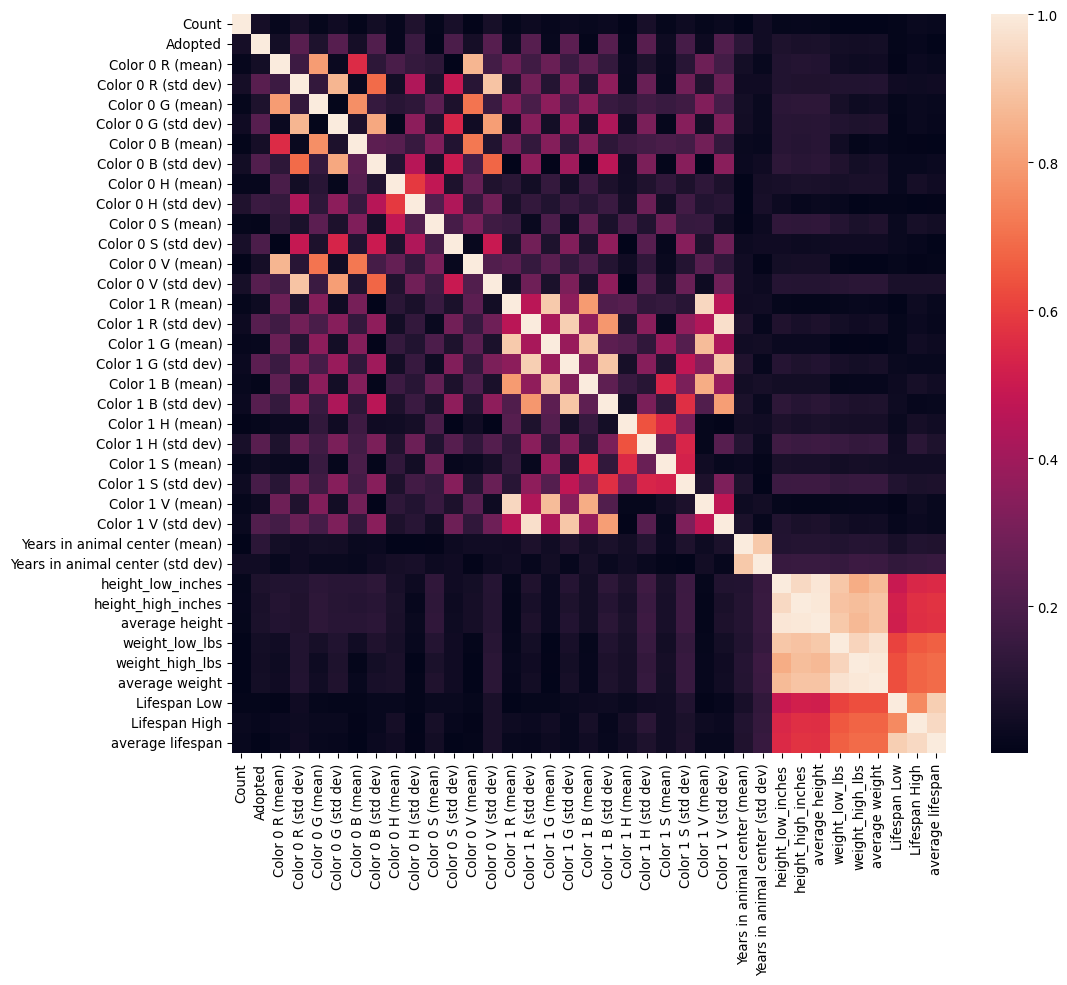

In [68]:
df_breeds_with_info_corr = df_breeds_with_info.corr()

plt.figure(num=None, figsize=(12, 10), dpi=96, facecolor='w', edgecolor='k')
sns.heatmap(data=df_breeds_with_info_corr.abs())

def score(df, var1, var2):
    print(f'Corr({var1}, {var2}) ≈ {df[var1][var2]}')

score(df_breeds_with_info_corr, 'Adopted', 'Color 0 B (mean)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 B (std dev)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 V (mean)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 V (std dev)')
score(df_breeds_with_info_corr, 'Adopted', 'average height')
score(df_breeds_with_info_corr, 'Adopted', 'height_low_inches')
score(df_breeds_with_info_corr, 'Adopted', 'height_high_inches')
score(df_breeds_with_info_corr, 'Adopted', 'Lifespan Low')

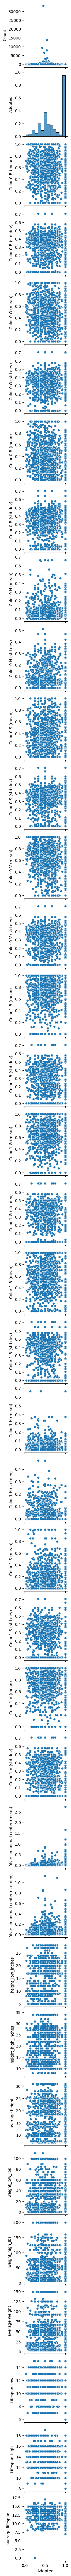

In [69]:
sns.pairplot(data=df_breeds_with_info, x_vars=['Adopted'])

## Height ~ adopted?

Is the average height of a breed correlated with likelihood of an animal from that breed being adopted? The Pearson correlation coefficient was Corr(Adopted, average height) ≈ 0.2286839421877296.

This section analyzes this by breed and also by individual animal.

See also: toward the end of this notebook, there are histograms that compare many variables with adoption likelihood.

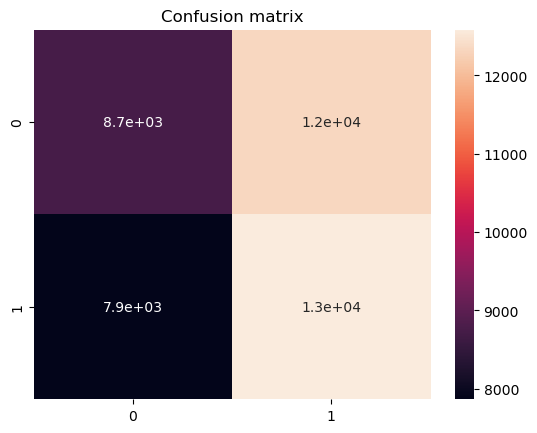

Classification report
              precision    recall  f1-score   support

           0       0.53      0.41      0.46     21070
           1       0.51      0.62      0.55     20450

    accuracy                           0.51     41520
   macro avg       0.52      0.52      0.51     41520
weighted avg       0.52      0.51      0.51     41520



In [70]:
days_limit = 30

df_out_with_breeds_info_filtered = animalsLongerThan(days_limit)

df_hl = df_out_with_breeds_info[['average height', 'Adopted']].dropna()

y_data = df_hl['Adopted'].astype(dtype=int)
x_data = df_hl['average height'].astype(dtype=float)

x_data = x_data.values.reshape(-1,1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
y_test_pred = model.predict(x_test_data)

sns.heatmap(data=confusion_matrix(y_test_data, y_test_pred), annot=True)
plt.title("Confusion matrix")
plt.show()

print("Classification report")
print(classification_report(y_test_data, y_test_pred))

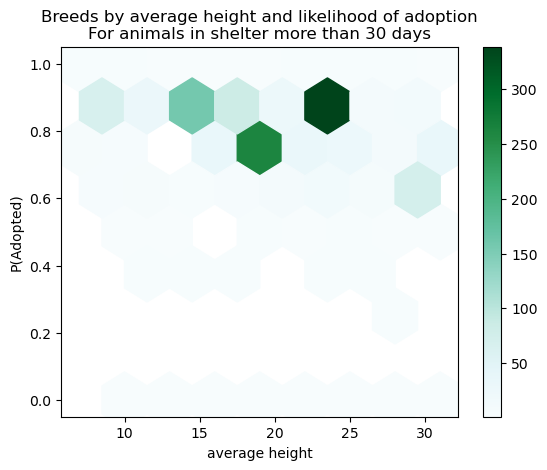

In [71]:
days_limit = 30
df_breeds_filtered = breeds(animalsLongerThan(days_limit))
df_breeds_filtered.plot.hexbin(x='average height', y='Adopted', gridsize=8, C='Count')
plt.ylabel("P(Adopted)")
plt.title(f"Breeds by average height and likelihood of adoption\nFor animals in shelter more than {days_limit} days")
plt.show()

I think with all this analaysis on height ~ adoption, I dont find a strong correlation between the two.


# Analysis by individuals

## Color

(results)

In [72]:
print('Colors')
print(df_out_with_breeds_info['Color 0'].unique())
print(df_out_with_breeds_info['Color 1'].unique())

Colors
<StringArray>
[            'Black',            'Orange',             'White',
               'Red',            'Tortie',              'Gray',
            'Silver',              'Blue',            'Torbie',
      'Orange Tabby',             'Brown',           'Apricot',
       'Brown Tabby',        'Blue Tabby',        'Blue Point',
            'Calico',     'Brown Brindle',               'Tan',
         'Chocolate',            'Yellow',       'Black Tabby',
       'Lilac Point',       'Cream Tabby',              'Buff',
          'Tricolor',             'Liver',             'Cream',
              'Fawn',        'Blue Merle',         'Red Merle',
      'Tortie Point',      'Calico Point',       'Brown Merle',
      'Silver Tabby',       'Black Smoke',        'Lynx Point',
             'Sable',              'Gold',        'Seal Point',
     'Black Brindle',        'Blue Cream',       'Brown Tiger',
          'Red Tick',       'Flame Point',         'Blue Tick',
        'Gray Tabby

In [73]:
def bigCorr_bernoulli(df, independent, dependent):
    numerator = (
        df[[independent, dependent]].groupby(independent).value_counts()
    )
    
    denominator = (
        df[[independent]].groupby(independent).value_counts()
    )
    
    return (numerator.div(denominator))[:,True]

In [74]:
def bigCorr_bernoulli_custom_colors_2(df_out_colors_1, df_out_colors_2):
    df_out_colors_2_color_0 = df_out_colors_2[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_1 = df_out_colors_2[['Color 1', 'Adopted']].rename(columns={'Color 1': 'Color'})
    
    numerator = (
        df_out_colors_2_color_0.groupby('Color').value_counts().add(
            df_out_colors_2_color_1.groupby('Color').value_counts(),
            fill_value=0
        )
    )
    
    denominator = (
        df_out_colors_2_color_0[['Color']].groupby('Color').value_counts().add(
            df_out_colors_2_color_1[['Color']].groupby('Color').value_counts(),
            fill_value=0
        )
    )
    
    return (numerator.div(denominator))[:,True]

def bigCorr_bernoulli_custom_colors_1_or_2(df_out_colors_1, df_out_colors_2):
    df_out_colors_1_color_0 = df_out_colors_1[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_0 = df_out_colors_2[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_1 = df_out_colors_2[['Color 1', 'Adopted']].rename(columns={'Color 1': 'Color'})
    
    numerator = (
        df_out_colors_1_color_0.groupby('Color').value_counts().add(
            df_out_colors_2_color_0.groupby('Color').value_counts().add(
                df_out_colors_2_color_1.groupby('Color').value_counts(),
                fill_value=0
            ),
            fill_value=0
        )
    )
    
    denominator = (
        df_out_colors_1_color_0[['Color']].groupby('Color').value_counts().add(
            df_out_colors_2_color_0[['Color']].groupby('Color').value_counts().add(
                df_out_colors_2_color_1[['Color']].groupby('Color').value_counts(),
                fill_value=0
            ),
            fill_value=0
        )
    )
    
    return (numerator.div(denominator))[:,True]

In [75]:
# This is copied from prep.ipynb

from math import pi

# colors.csv was compiled from these wikipedia articles
# https://en.wikipedia.org/wiki/List_of_colors:_A–F
# https://en.wikipedia.org/wiki/List_of_colors:_G%E2%80%93M
# https://en.wikipedia.org/wiki/List_of_colors:_N%E2%80%93Z
# Then the "—" character was replaced with "0"
df_colors = pd.read_csv('colors.csv')
df_colors = df_colors.convert_dtypes(infer_objects=True)
df_colors['Name'] = df_colors['Name'].str.lower()
df_colors['Red (RGB)'] = pd.to_numeric(df_colors['Red (RGB)'].str.replace('%', '')).div(100)
df_colors['Green (RGB)'] = pd.to_numeric(df_colors['Green (RGB)'].str.replace('%', '')).div(100)
df_colors['Blue (RGB)'] = pd.to_numeric(df_colors['Blue (RGB)'].str.replace('%', '')).div(100)
df_colors['Hue (HSL/HSV)'] = pd.to_numeric(df_colors['Hue (HSL/HSV)'].str.replace('°', '')).div(360)
df_colors['Satur. (HSL)'] = pd.to_numeric(df_colors['Satur. (HSL)'].str.replace('%', '')).div(100)
df_colors['Light (HSL)'] = pd.to_numeric(df_colors['Light (HSL)'].str.replace('%', '')).div(100)
df_colors['Satur. (HSV)'] = pd.to_numeric(df_colors['Satur. (HSV)'].str.replace('%', '')).div(100)
df_colors['Value (HSV)'] = pd.to_numeric(df_colors['Value (HSV)'].str.replace('%', '')).div(100)
df_colors.head()

def colorInfo(color):
    color = color.lower()
    words = [color] if color.count(' ') == 0 else [color] + color.split(' ')
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name == word]
            if len(items) > 0:
                return items
        except:
            continue
    
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name.str.contains(word)]
            if len(items) > 0:
                return items
        except:
            continue
        
    return None

def rgb(color):
    info = colorInfo(color)
    if info is None: return (None, None, None)
    r = info['Red (RGB)'].values[0]
    g = info['Green (RGB)'].values[0]
    b = info['Blue (RGB)'].values[0]
    return (r, g, b)

/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


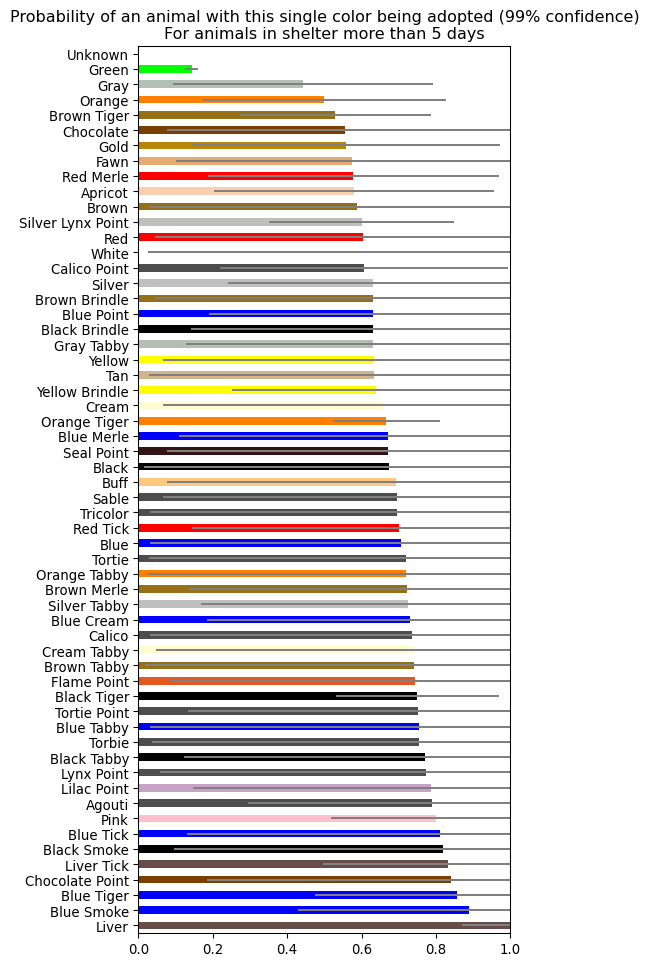

58 colors



/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


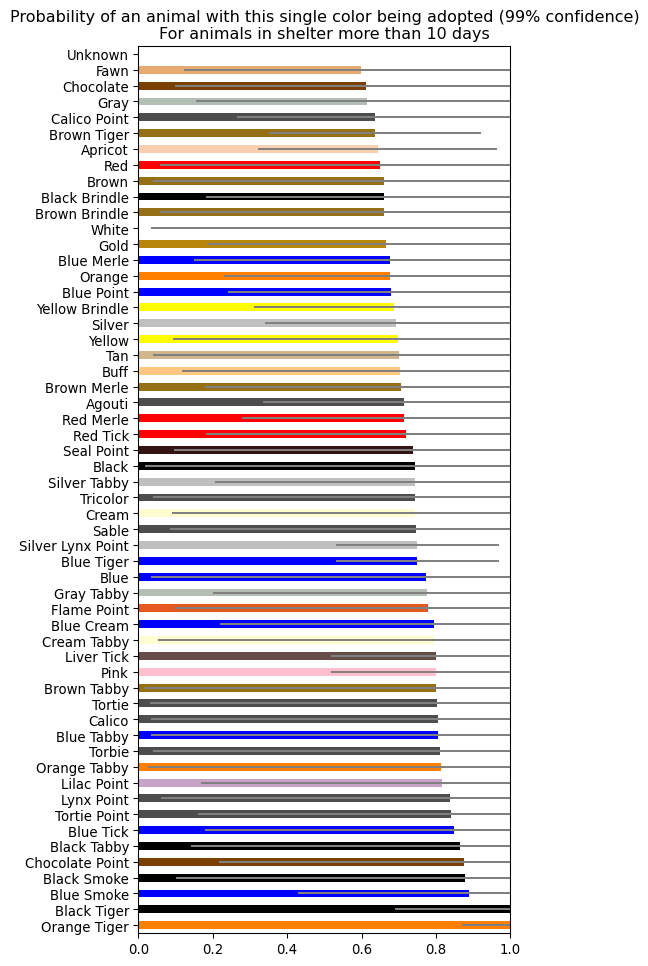

56 colors



/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


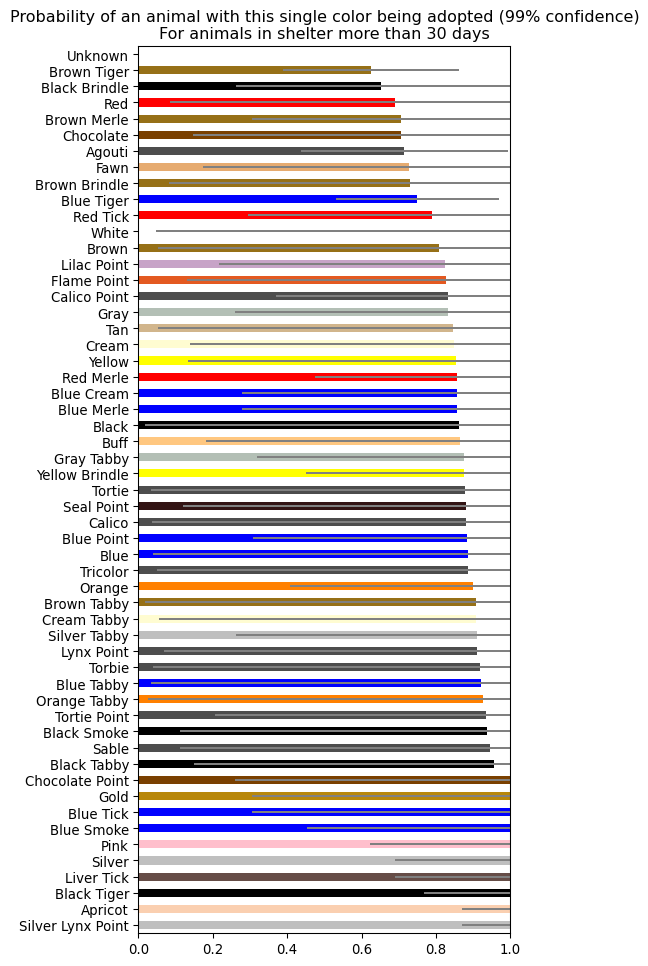

55 colors



NameError: name 'df_out_colors_2' is not defined

In [76]:
from math import floor


def color_dataframes(days_limit):
    df_out_filtered = animalsLongerThan(days_limit)
    df_out_colors_1 = df_out_filtered.loc[(df_out_filtered['Color 0'].notna() == True) & (df_out_filtered['Color 1'].notna() == False)]
    df_out_colors_2 = df_out_filtered.loc[(df_out_filtered['Color 0'].notna() == True) & (df_out_filtered['Color 1'].notna() == True)]
    return df_out_colors_1, df_out_colors_2

def chartColorAdoptionLikelihood(df_colors, color_relation, days_limit):
    disclaimer = f"For animals in shelter more than {days_limit} days"
    
    # Wilson confidence interval
    # https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    
    alpha = 0.01
    z = st.norm.ppf(1 - (alpha / 2))
    n = df_colors.Count
    p = df_colors.Adopted
    p_center = (1 / (1 + ((z ** 2) / n))) * (p + ((z ** 2) / (2 * n)))
    p_halfextent = (z / (1 + ((z ** 2) / n))) * ((( (p * (1 - p)) / (n) ) + ((z ** 2) / (4 * (n ** 2)))) ** (1/2))
    p_low = p_center - p_halfextent
    p_high = p_center - p_halfextent
    
    colors = [rgb(color) for color in df_colors.index]
    colors = [color if color[0] != None else '0.3' for color in colors]
    
    plt.figure(num=None, figsize=(5, 12), dpi=96, facecolor='w', edgecolor='k')
    plt.title(f'Probability of an animal with this {color_relation} color being adopted ({floor(100 * (1 - alpha))}% confidence)\n{disclaimer}')
    ax = df_colors.Adopted.plot.barh(x='Color', xerr=[p_low, p_high], ecolor='0.5', color=colors)
    ax.set_xlim(0, 1)
    plt.show()
    print(f'{len(df_colors)} colors')
    print()

def colors_single(days_limit):
    df_out_colors_1, df_out_colors_2 = color_dataframes(days_limit)
    colors_adopted = bigCorr_bernoulli(df_out_colors_1, 'Color 0', 'Adopted')
    colors_count = df_out_colors_1['Color 0'].value_counts()
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'single', days_limit)
    
def colors_mixed(days_limit):
    df_out_colors_1, df_out_colors_2 = color_dataframes(days_limit)
    colors_adopted = bigCorr_bernoulli_custom_colors_2(df_out_colors_1, df_out_colors_2)
    colors_count = df_out_colors_2['Color 0'].value_counts().add(df_out_colors_2['Color 1'].value_counts(), fill_value=0)
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'mixed', days_limit)
    
def colors_singleOrMixed(days_limit):
    df_out_colors_1, df_out_colors_2 = color_dataframes(days_limit)
    colors_adopted = bigCorr_bernoulli_custom_colors_1_or_2(df_out_colors_1, df_out_colors_2)
    colors_count = df_out_colors_1['Color 0'].value_counts().add(df_out_colors_2['Color 0'].value_counts(), fill_value=0).add(df_out_colors_2['Color 1'].value_counts(), fill_value=0)
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'single or mixed', days_limit)

colors_single(5)
colors_single(10)
colors_single(30)
colors_mixed(5)
colors_mixed(10)
colors_mixed(30)
colors_singleOrMixed(5)
colors_singleOrMixed(10)
colors_singleOrMixed(30)

## Sex

In [ ]:
# TODO 6: regress sex against adoption likelihood
# Please make 3 bar charts:
#  - "Sex upon Outcome" (neutered male, spayed female, intact male, intact female)
#  - male or female
#  - neutered/spayed or intact
# Also please construct the 95% confidence interval and make it the error bars
# see the earlier cell in the section on color for an example of how to do this

## Breed characteristics

This analysis considers individual animals and looks for correlations between characteristics of their breed and their outcome.

It looks like the animals belonging to a breed with an average height around 20-25 \(inches?\) are more likely to be adopted than others, and animals between 5-12 inches are less likely than others to be adopted.

**TODO 7:** interpret the other graphs. Why are the different lifespan variables distributed the way they are, and why are they distributed differently compared to each other?

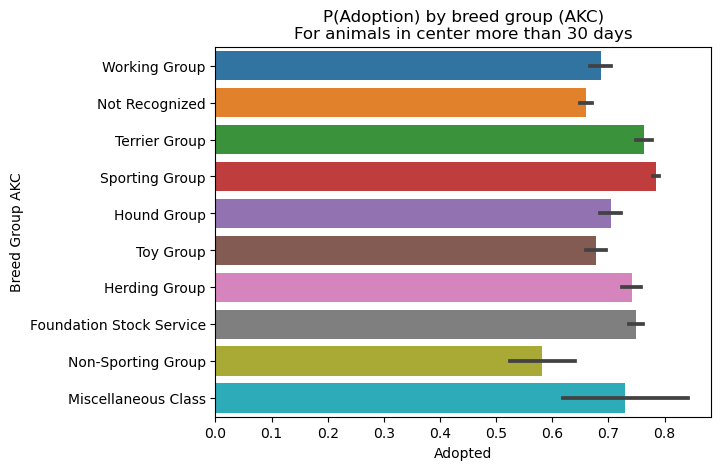

In [ ]:
day_limit = 10
df_out_1 = animalsLongerThan(day_limit)
df_out_1 = df_out_1.assign(Adopted=df_out_1.Adopted.fillna(False))

ax=sns.barplot(data=df_out_1,
               y='Breed Group AKC',
               x='Adopted',
               estimator="mean")
plt.title(f"P(Adoption) by breed group (AKC)\nFor animals in center more than {days_limit} days")
plt.show()

average height ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

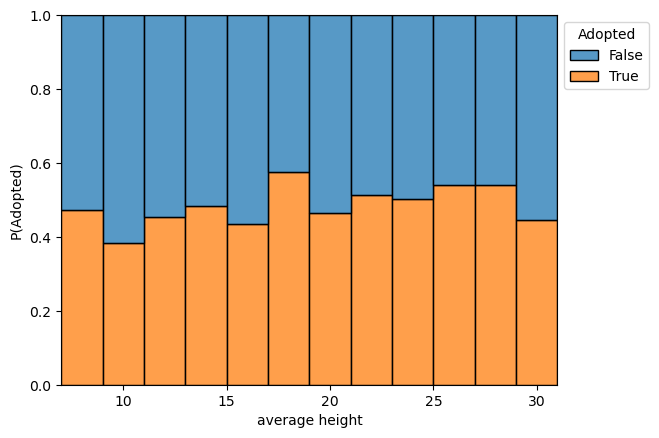

average height ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

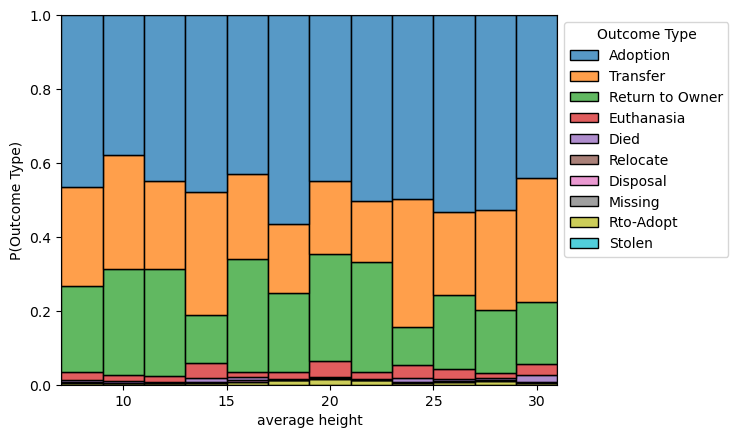

Est. lifespan remaining ~ Adopted


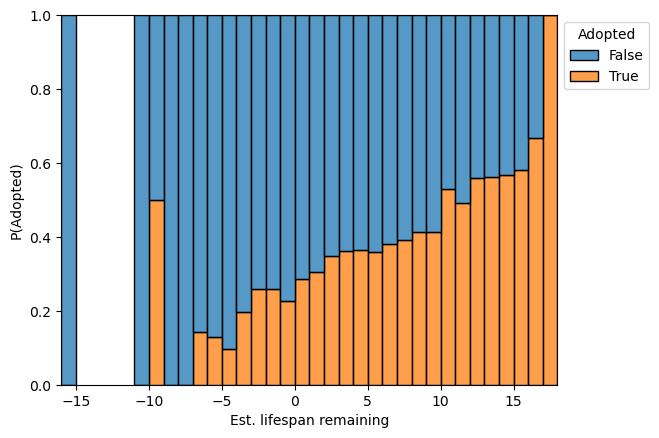

Est. lifespan remaining ~ Outcome Type


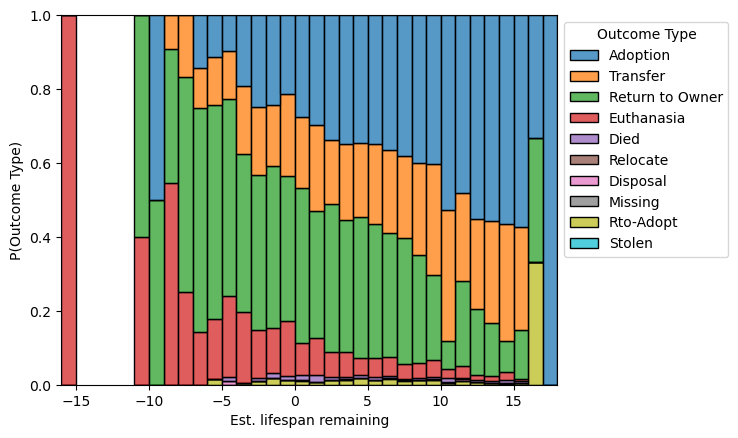

average lifespan ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

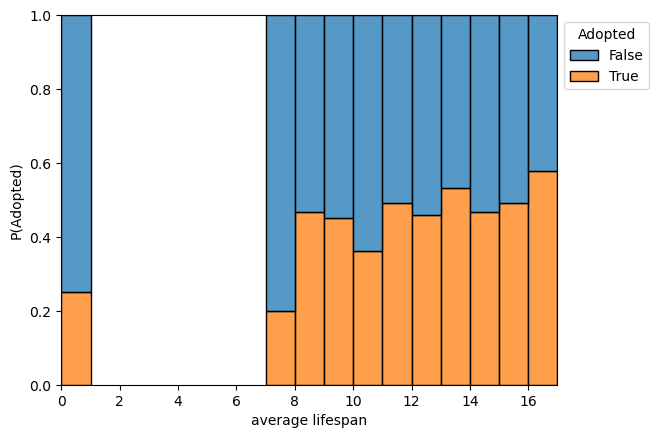

average lifespan ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

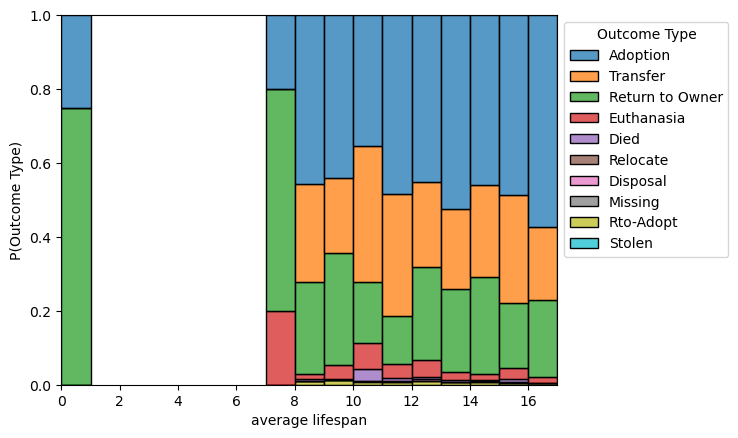

Lifespan Low ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

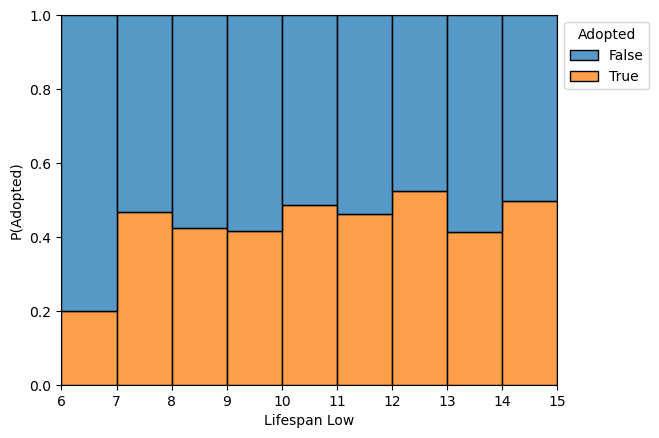

Lifespan Low ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

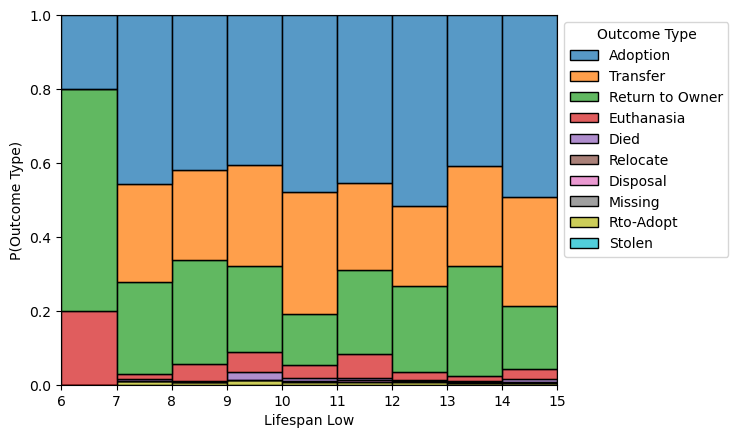

Lifespan High ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

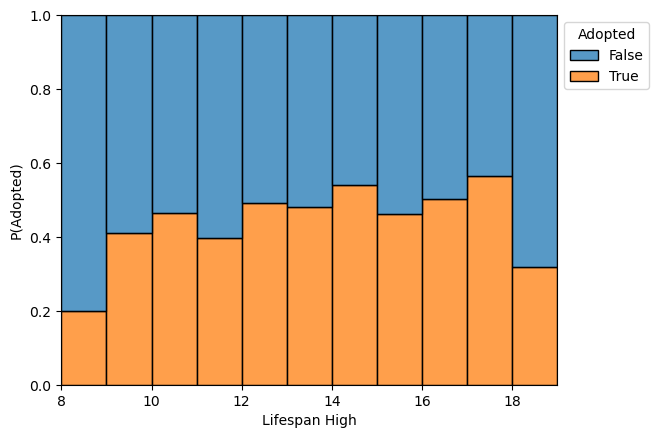

Lifespan High ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

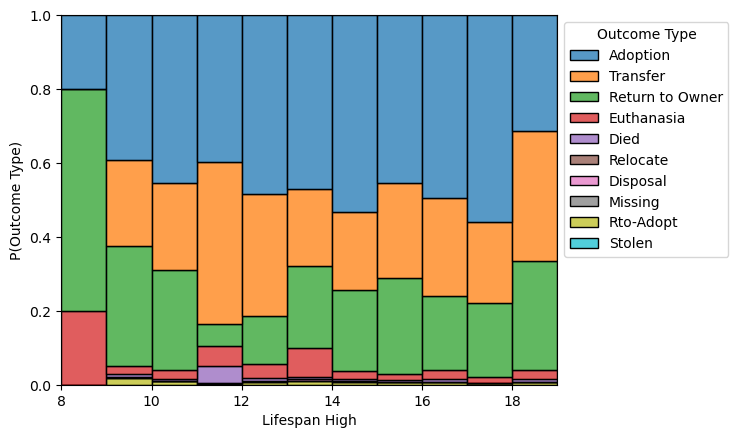

Age upon Outcome (years) ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

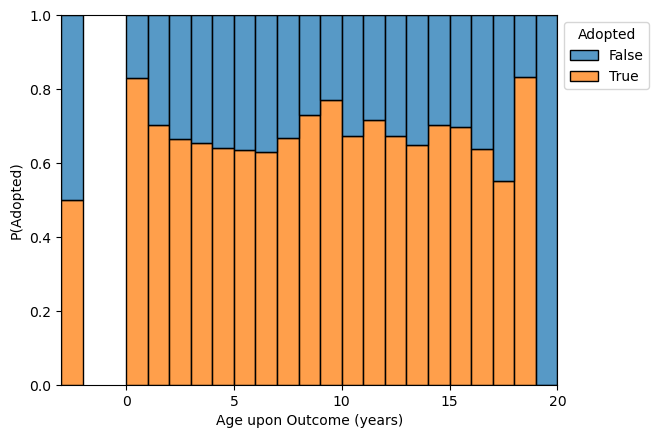

Age upon Outcome (years) ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

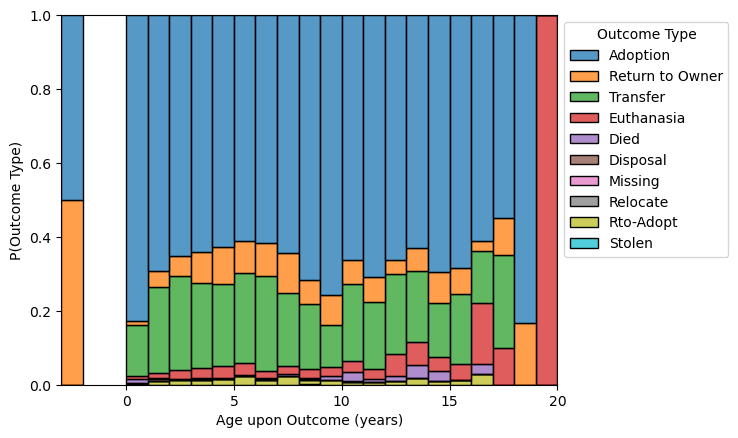

Years in animal center ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

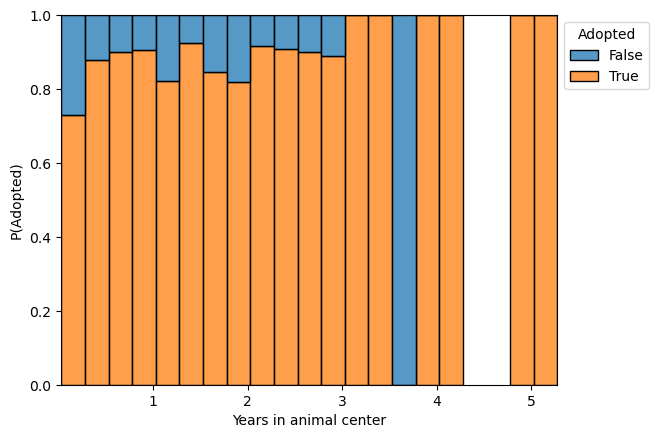

Years in animal center ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

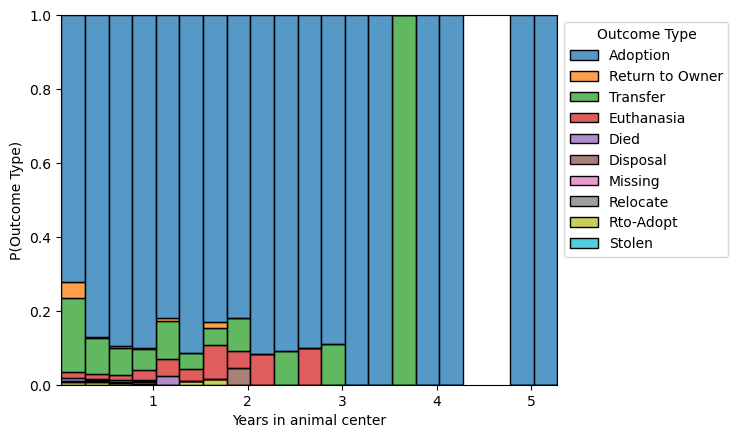

Color 0 H ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

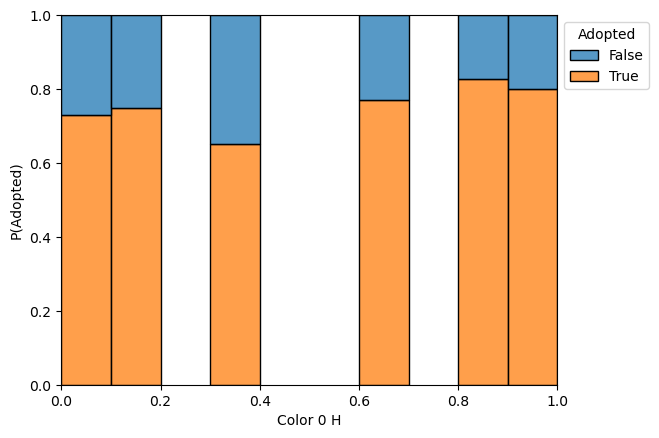

Color 0 H ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

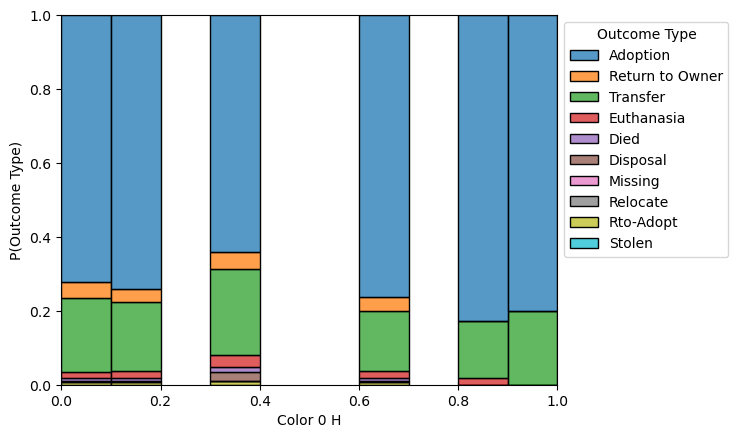

Color 0 S ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

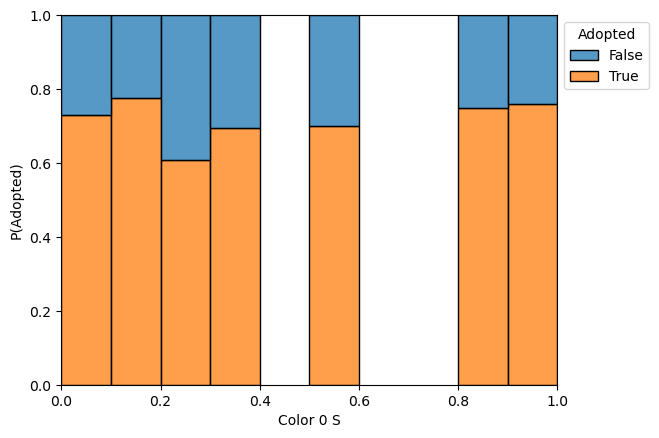

Color 0 S ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

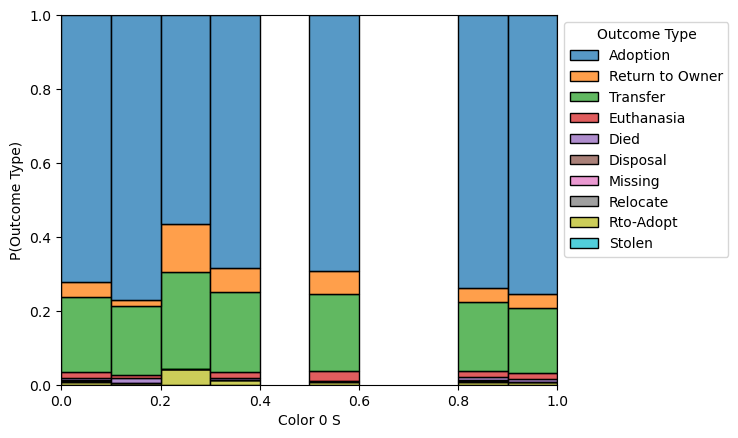

Color 0 V ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

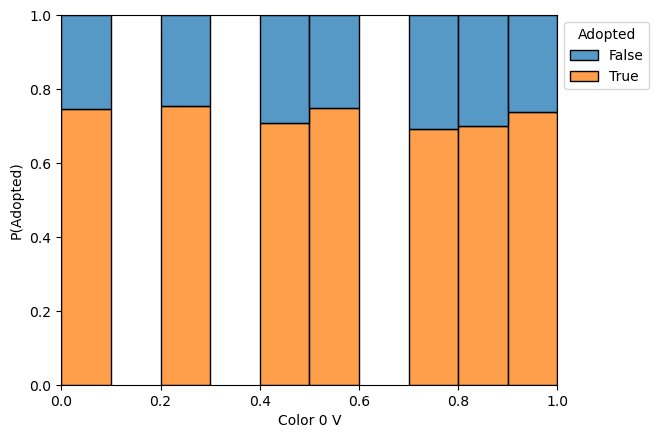

Color 0 V ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

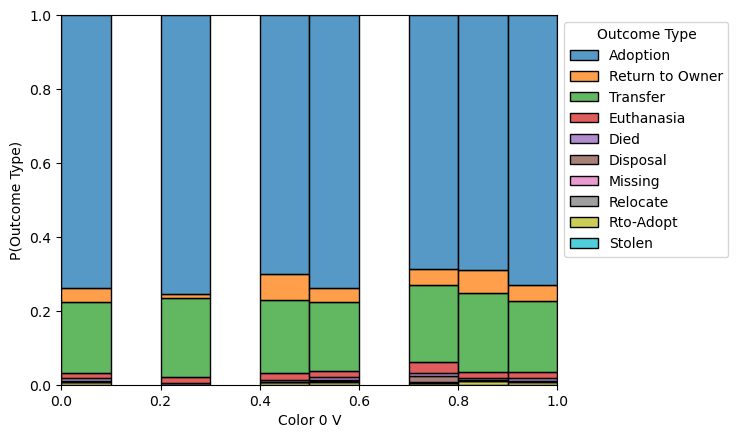

In [ ]:
day_limit = 10
df_out_1 = animalsLongerThan(day_limit)
df_out_1 = df_out_1.assign(Adopted=df_out_1.Adopted.fillna(False))
df_out_with_breeds_info_1 = df_out_with_breeds_info.assign(Adopted=df_out.Adopted.fillna(False))

def correlo_histogram(df, independent, dependent, binwidth):
    print(f'{independent} ~ {dependent}')
    # TODO 8: add error bars when the dependent variable is "Adopted"
    # (see how the confidence interval was constructed in the previous cell
    # for regression by color)
    
    ax=sns.histplot(data=df,
             x=independent,
             hue=dependent,
             multiple='fill',
             binwidth=binwidth)
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
    plt.ylabel(f"P({dependent})")
    plt.show()

independent_vars_breeds_info = [
    ['average height', 2],
    ['Est. lifespan remaining', 1],
    ['average lifespan', 1],
    ['Lifespan Low', 1],
    ['Lifespan High', 1],
]

independent_vars_individuals = [
    ['Age upon Outcome (years)', 1],
    ['Years in animal center', 0.25],
    ['Color 0 H', 0.1],
    ['Color 0 S', 0.1],
    ['Color 0 V', 0.1],
]

for [independent, binwidth] in independent_vars_breeds_info:
    for dependent in ['Adopted', 'Outcome Type']:
        correlo_histogram(df_out_with_breeds_info_1, independent, dependent, binwidth)

for [independent, binwidth] in independent_vars_individuals:
    for dependent in ['Adopted', 'Outcome Type']:
        correlo_histogram(df_out_1, independent, dependent, binwidth)

Based on these charts it seems the strongest indicator of adoption in a pet is its age. The graph 'est lifespan remaining ~ adopted' shows this very strongly as does the graph 'age upon outcome ~ adopted'.

Another correlation in these graphs is in 'average lifespan ~adoption'. This once again shows that potential adopters favor pets with a lot of years ahead of them. 

This seems to imply that the biggest indicator of whether or not an animal will be adopted is its age. Younger pets are more likely to be adopted by a rather strong degree.


## Age


Lets see if we can pull of some logistic regression of age ~ adoption


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

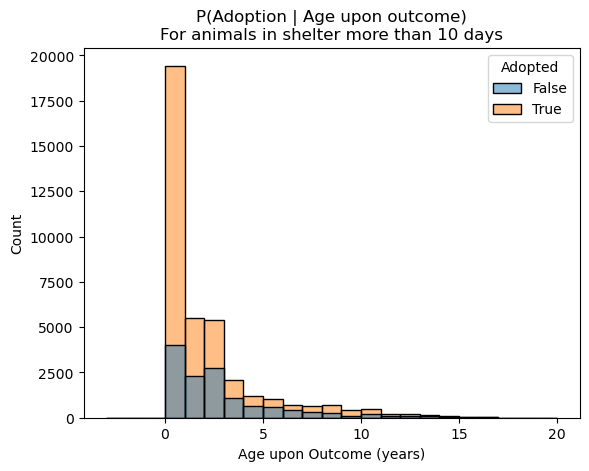

In [ ]:
days_limit = 10
df_out_1 = animalsLongerThan(days_limit)
df_al = df_out_1.dropna(how='all',axis=0) 
df_al['Age upon Outcome (years)'] = df_al['Age upon Outcome (years)'].fillna(0)
df_al['Adopted'] = df_al['Adopted'].fillna(False)

sns.histplot(data=df_al, x='Age upon Outcome (years)', hue='Adopted', binwidth=1)
plt.title(f'P(Adoption | Age upon outcome)\nFor animals in shelter more than {day_limit} days')
plt.show()

Adopted ~ Age upon outcome (years)
LogisticRegression


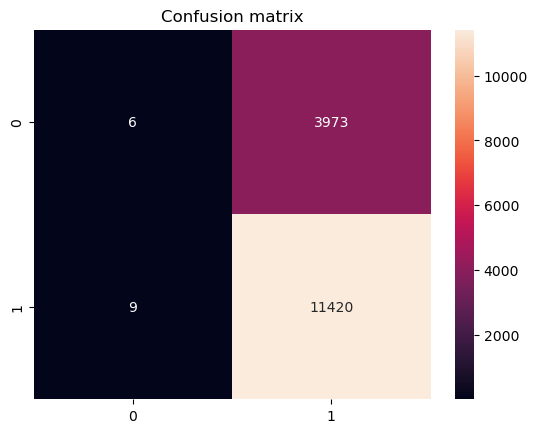

Classification report
              precision    recall  f1-score   support

           0       0.40      0.00      0.00      3979
           1       0.74      1.00      0.85     11429

    accuracy                           0.74     15408
   macro avg       0.57      0.50      0.43     15408
weighted avg       0.65      0.74      0.63     15408


Adopted ~ Age upon outcome (years)
GaussianNB


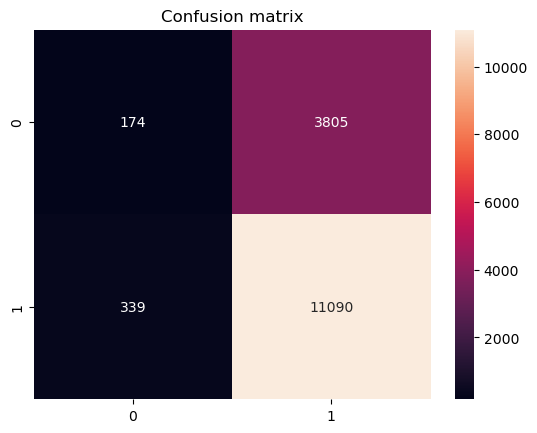

Classification report
              precision    recall  f1-score   support

           0       0.34      0.04      0.08      3979
           1       0.74      0.97      0.84     11429

    accuracy                           0.73     15408
   macro avg       0.54      0.51      0.46     15408
weighted avg       0.64      0.73      0.64     15408


Adopted ~ Age upon outcome (years)
RandomForestClassifier


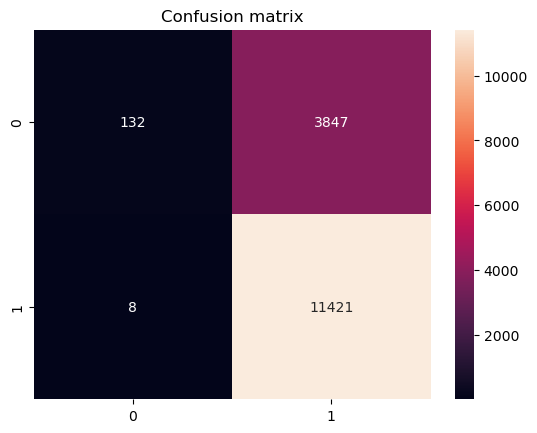

Classification report
              precision    recall  f1-score   support

           0       0.94      0.03      0.06      3979
           1       0.75      1.00      0.86     11429

    accuracy                           0.75     15408
   macro avg       0.85      0.52      0.46     15408
weighted avg       0.80      0.75      0.65     15408




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


y_data = df_al['Adopted'].astype(dtype=int)
x_data = df_al['Age upon Outcome (years)'].astype(dtype=float)


x_data = x_data.values.reshape(-1,1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
models = [LogisticRegression, GaussianNB, RandomForestClassifier]
for modelType in models:
    print("Adopted ~ Age upon outcome (years)")
    print(modelType.__name__)
    model = modelType()
    model.fit(x_training_data, y_training_data)
    # predictions = model.predict(x_test_data)
    sns.heatmap(confusion_matrix(y_test_data, model.predict(x_test_data)), annot=True, fmt="0")
    plt.title("Confusion matrix")
    plt.show()
    print("Classification report")
    print(classification_report(y_test_data, model.predict(x_test_data)))
    print()

They all have around 75% accuracy.